# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [84]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [85]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.feature_selection import RFE
#import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Reading csv and setting column index
df = pd.read_csv('day.csv', index_col=0)

# View first 5 rows
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [87]:
# Drop unnecessary column
df = df.drop('dteday', axis=1)

In [88]:
# Print shape of dataframe
og_df_shape = df.shape
print(og_df_shape)

(730, 14)


In [89]:
# Describe dataframe
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [90]:
# View info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 85.5 KB


In [91]:
# Check percantage of null values in the data
df.isnull().sum()/len(df)*100

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [92]:
# Check duplicate values in the data
df.duplicated().sum()

0

## Mapping categories to numerical variables that represent different categories

In [93]:
# Mapping categories in yr
df.yr = df.yr.map({0:'2018', 1:'2019'})
df.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [94]:
# Mapping categories in season
df.season = df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [95]:
# Mapping categories in weathersit
df.weathersit = df.weathersit.map({1:'Clear', 2:'Misty', 3:'Light_rain_snow', 4:'Heavy_rain_snow'})
df.weathersit.value_counts()

Clear              463
Misty              246
Light_rain_snow     21
Name: weathersit, dtype: int64

In [96]:
# Mapping categories in mnth
df.mnth = df.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                       9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df.mnth.value_counts()

Jul    62
May    62
Jan    62
Oct    62
Aug    62
Mar    62
Dec    62
Sep    60
Jun    60
Nov    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [97]:
# Mapping categories in weekday
df.weekday = df.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
df.weekday.value_counts()

Tue    105
Mon    105
Sun    104
Thu    104
Sat    104
Fri    104
Wed    104
Name: weekday, dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 85.5+ KB


## Visualizing Data Before Creating Dummies

### Visualizing Non-Binary Numeric Variables

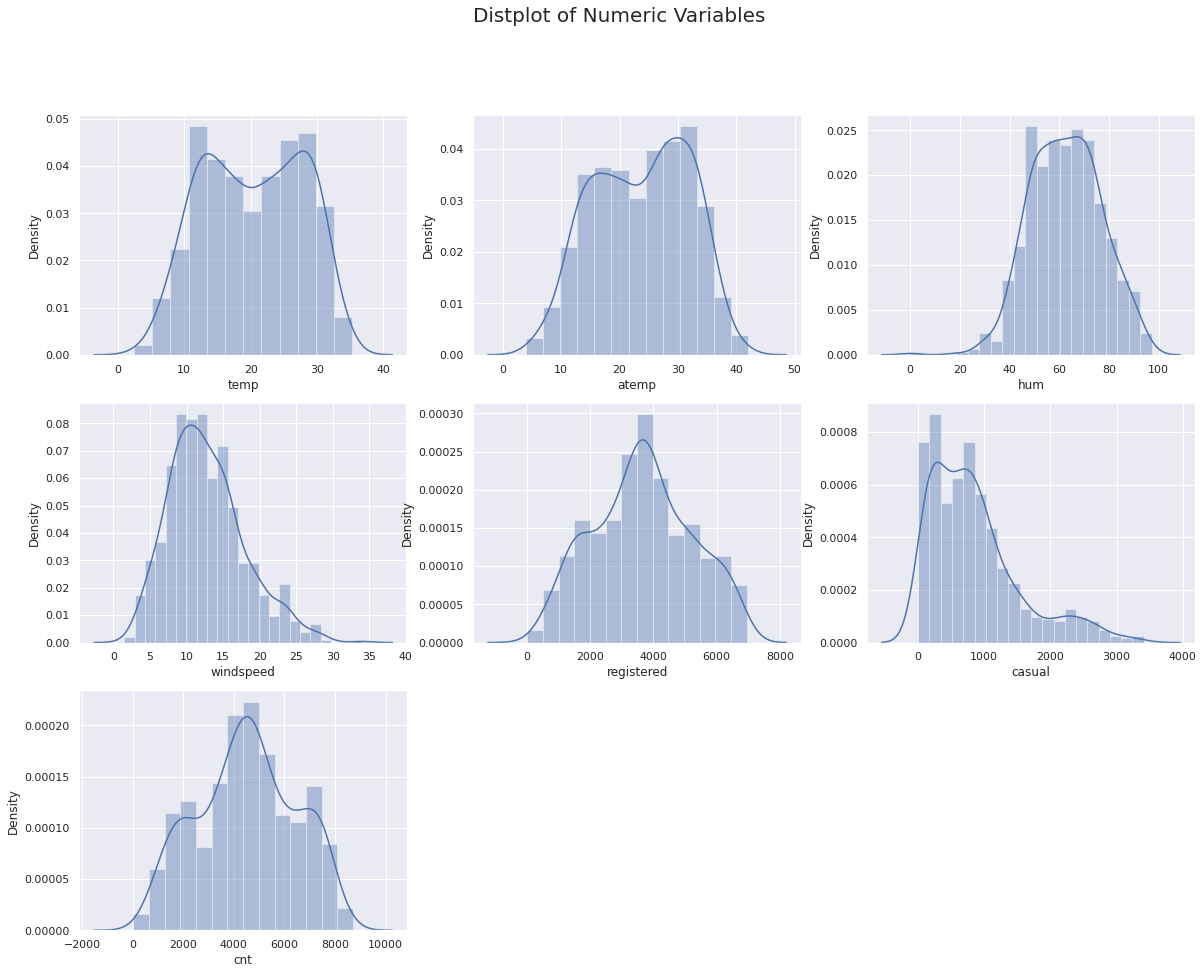

In [99]:
# Distplot of Numeric Variables

plt.figure(figsize=[20,15])
plt.subplot(3,3,1)
sns.distplot(df.temp)
plt.subplot(3,3,2)
sns.distplot(df.atemp)
plt.subplot(3,3,3)
sns.distplot(df.hum)
plt.subplot(3,3,4)
sns.distplot(df.windspeed)
plt.subplot(3,3,5)
sns.distplot(df.registered)
plt.subplot(3,3,6)
sns.distplot(df.casual)
plt.subplot(3,3,7)
sns.distplot(df.cnt)
plt.suptitle('Distplot of Numeric Variables',fontsize=20)
plt.show()

**Inference:** hum and windspeed show normal distribution.

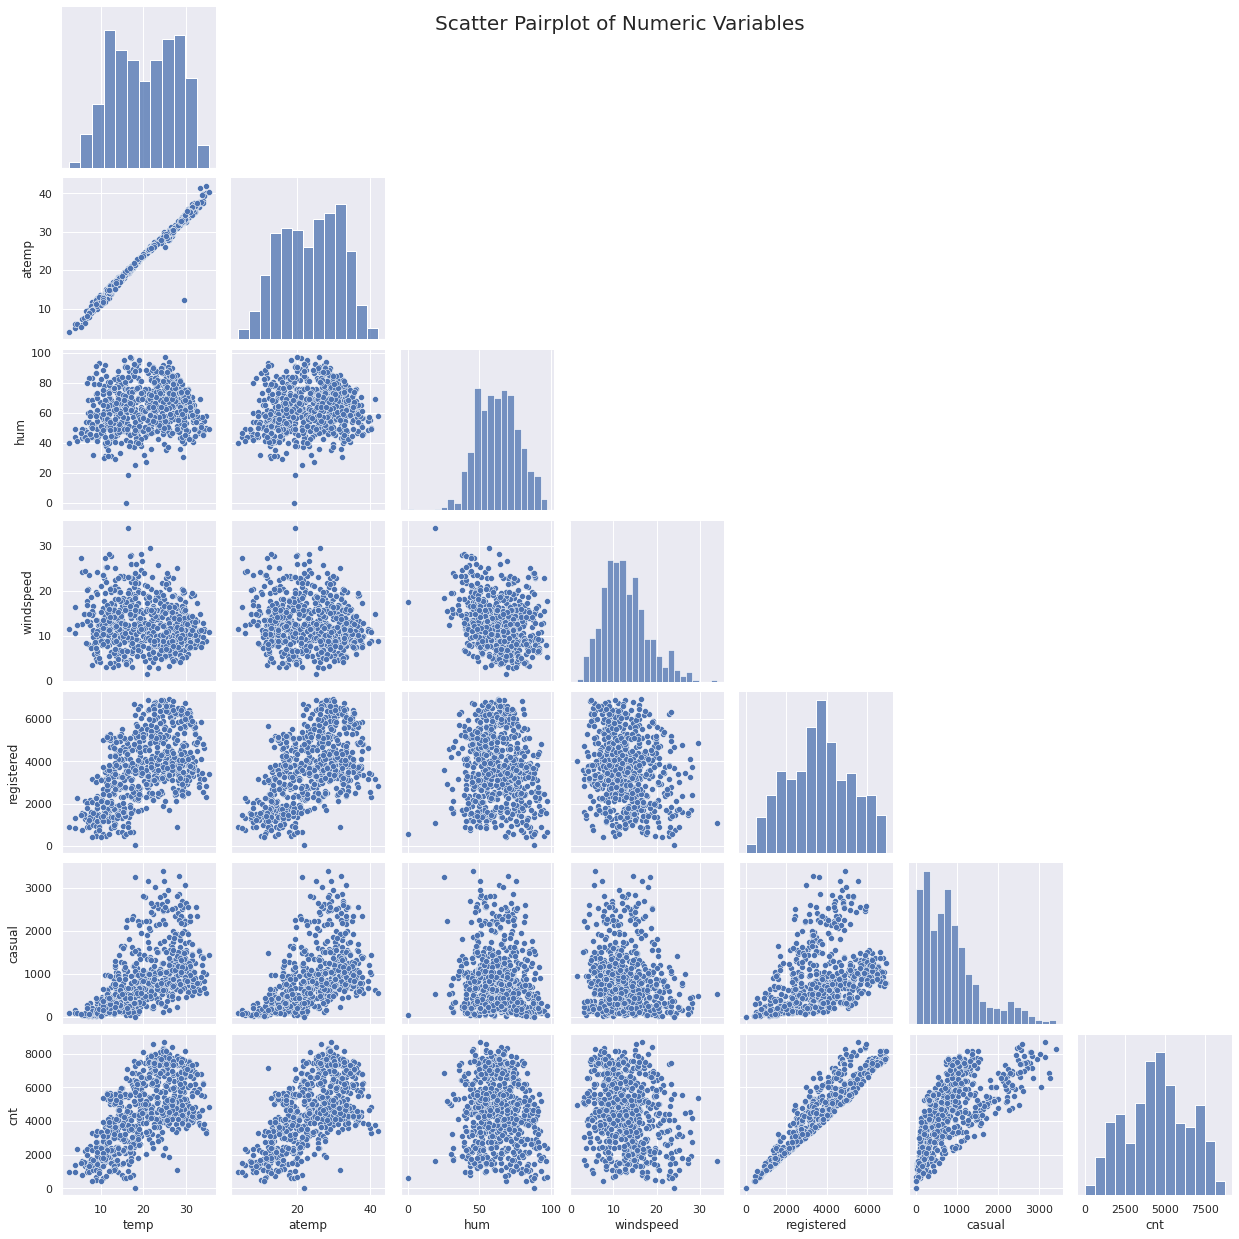

In [100]:
# Scatter Pairplot of Numeric Variables

sns.pairplot(df, vars=['temp', 'atemp', 'hum', 'windspeed', 'registered', 'casual', 'cnt'], corner=True)
plt.suptitle('Scatter Pairplot of Numeric Variables',fontsize=20)
plt.show()

**Inference:** linearity can be seen between: registered-temp, temp-cnt, atemp-cnt, registered-cnt

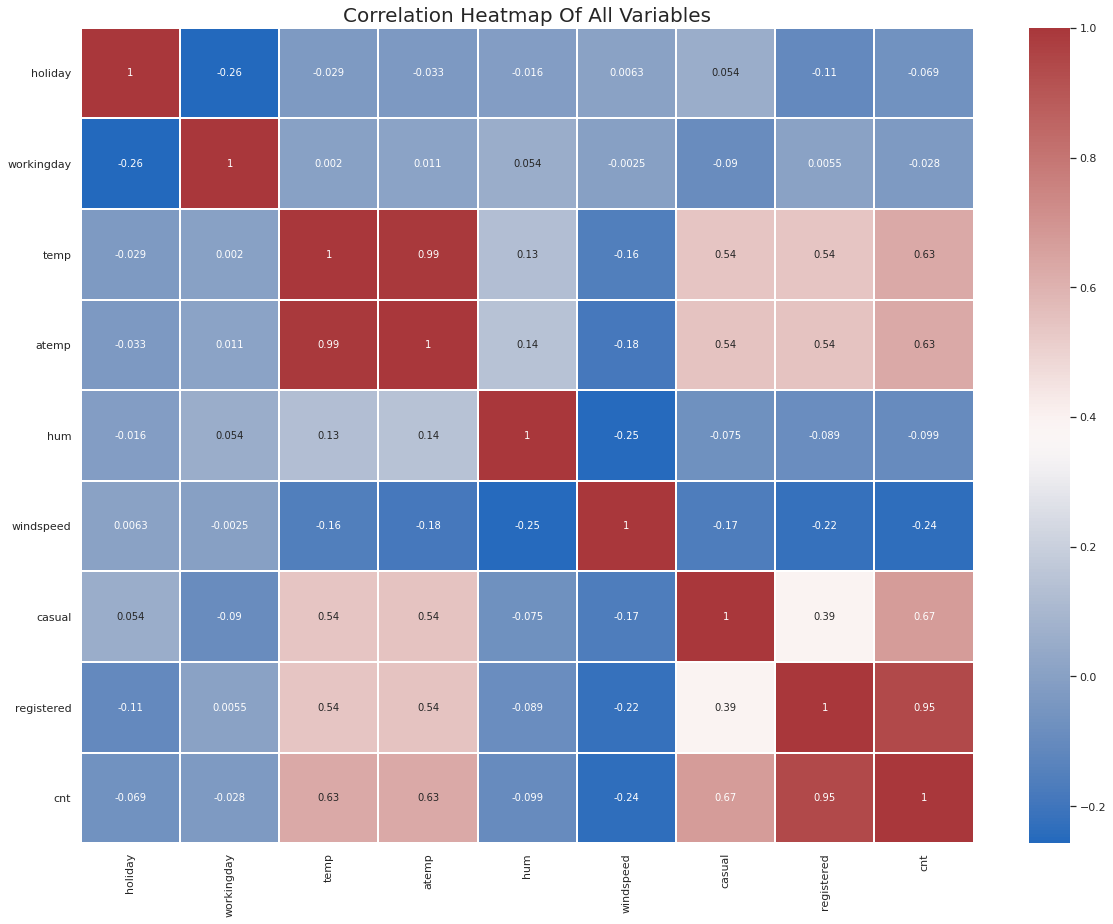

In [101]:
# Correlation Heatmap Of The Dataframe
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(), annot=True,cmap="vlag",linewidths=.4)
plt.title('Correlation Heatmap Of All Variables', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Inference:** temp and atemp are very highly correlated. registered and casual are highly correlated as well.

In [102]:
# dropping registered and casual columns as we have their ratio and they are no longer of any use, along with highly correlated atemp
df = df.drop(columns=['registered','casual','atemp'])

### Visualizing Binary Numeric Variables

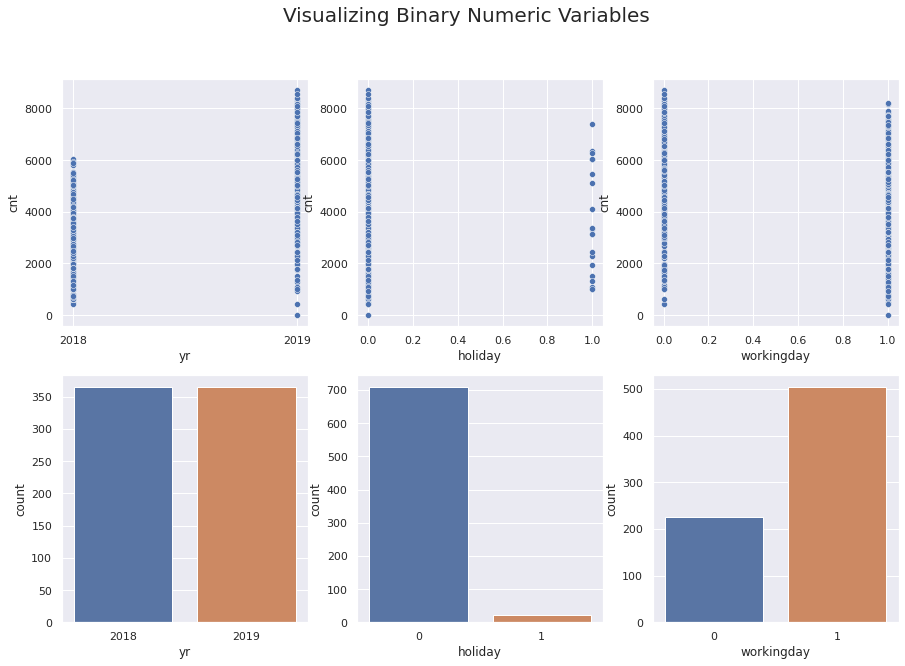

In [103]:
# Visualizing Binary Numeric Variables

plt.figure(figsize=[15,10])
plt.subplot(2,3,1)
sns.scatterplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.scatterplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.scatterplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.countplot(df.yr)
plt.subplot(2,3,5)
sns.countplot(df.holiday)
plt.subplot(2,3,6)
sns.countplot(df.workingday)
plt.suptitle('Visualizing Binary Numeric Variables',fontsize=20)
plt.show()

**Inference:** very few customers are seen during non-holiday. year 2019 has much higher and wider distribution of cnt than 2018

### Visualizing Categorical Variables

In [104]:
# Create variable for categorical data
df_categorical = df.select_dtypes(exclude=['float64', 'int64'])
print("The categorical columns in the dataframe are:", df_categorical.columns)

The categorical columns in the dataframe are: Index(['season', 'yr', 'mnth', 'weekday', 'weathersit'], dtype='object')


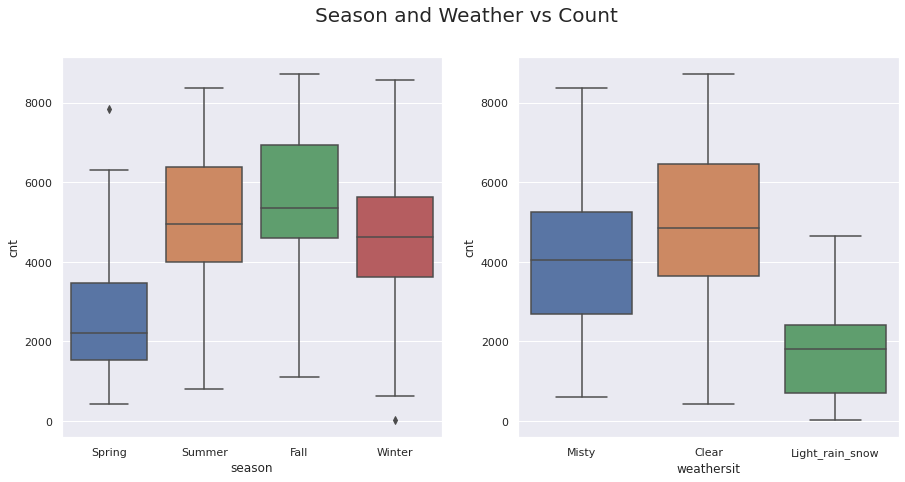

In [105]:
# Season and Weather vs Count boxplots
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.suptitle('Season and Weather vs Count', fontsize=20)
plt.show()

**Inference:** Fall season and clear weather attract highest customer count. Opposite in case of light rain/snow and Spring

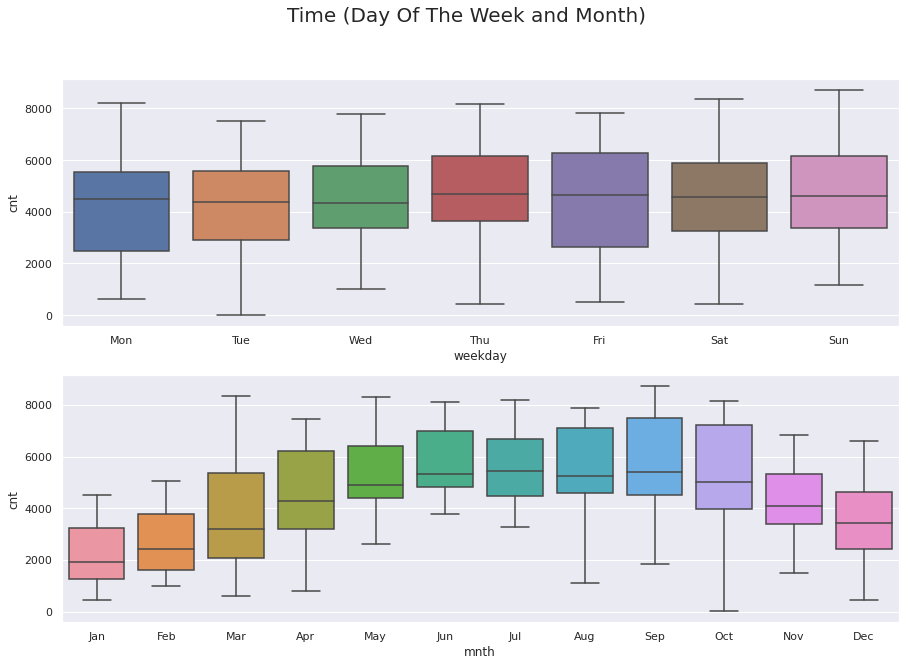

In [106]:
# Time (Day Of The Week and Month) boxplots
plt.figure(figsize=[15,10])
plt.subplot(2,1,1)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2,1,2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.suptitle('Time (Day Of The Week and Month)', fontsize=20)
plt.show()

**Inference:** Sunday has highest customer count however median is similar for all days. May to October have highest cnt and median levels.

## Creating Dummies

In [107]:
# Create dummies
df = pd.get_dummies(df, drop_first=True)
df.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rain_snow,weathersit_Misty
instant,,,,,,,,,,,,,,,,,,,,,
1,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
print("Shape of dataframe before creating dummies:", og_df_shape)
print("Shape of dataframe after creating dummies:", df.shape)

Shape of dataframe before creating dummies: (730, 14)
Shape of dataframe after creating dummies: (730, 29)


## Splitting The Data Into Training And Testing Sets

In [109]:
#Splitting into training and testing sets

df_train, df_test = train_test_split(df, train_size=0.7, random_state=1)

In [110]:
print("Size of training data:", df_train.size)
print("Size of testing data:", df_test.size)

Size of training data: 14790
Size of testing data: 6380


### Rescaling

In [111]:
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rain_snow,weathersit_Misty
instant,,,,,,,,,,,,,,,,,,,,,
136,0,1,23.677500,78.7917,8.500357,3958,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
627,0,1,22.652500,53.6667,14.416725,7591,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
555,0,1,29.144153,68.3333,12.125325,6569,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
312,0,1,16.741653,72.1667,4.625513,4205,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
313,0,1,16.400000,75.8333,4.167119,4109,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Using MinMaxScaler
scaler = MinMaxScaler()

In [113]:
# Applying scaler to all the columns except the 0/1 binary and 'dummy' variables
num_variables = ['cnt', 'windspeed', 'hum', 'temp']

df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

In [114]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rain_snow,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.031373,0.711765,0.564793,0.526474,0.400317,0.525079,0.219608,0.264706,0.250980,0.503922,...,0.080392,0.086275,0.147059,0.133333,0.127451,0.150980,0.149020,0.149020,0.031373,0.325490
std,0.174494,0.453386,0.226815,0.194258,0.190021,0.218870,0.414387,0.441610,0.434003,0.500476,...,0.272166,0.281045,0.354512,0.340268,0.333805,0.358381,0.356457,0.356457,0.174494,0.469018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.372655,0.379602,0.264072,0.382737,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.579661,0.524942,0.371641,0.527266,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.757395,0.668793,0.512950,0.680022,0.000000,1.000000,0.750000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


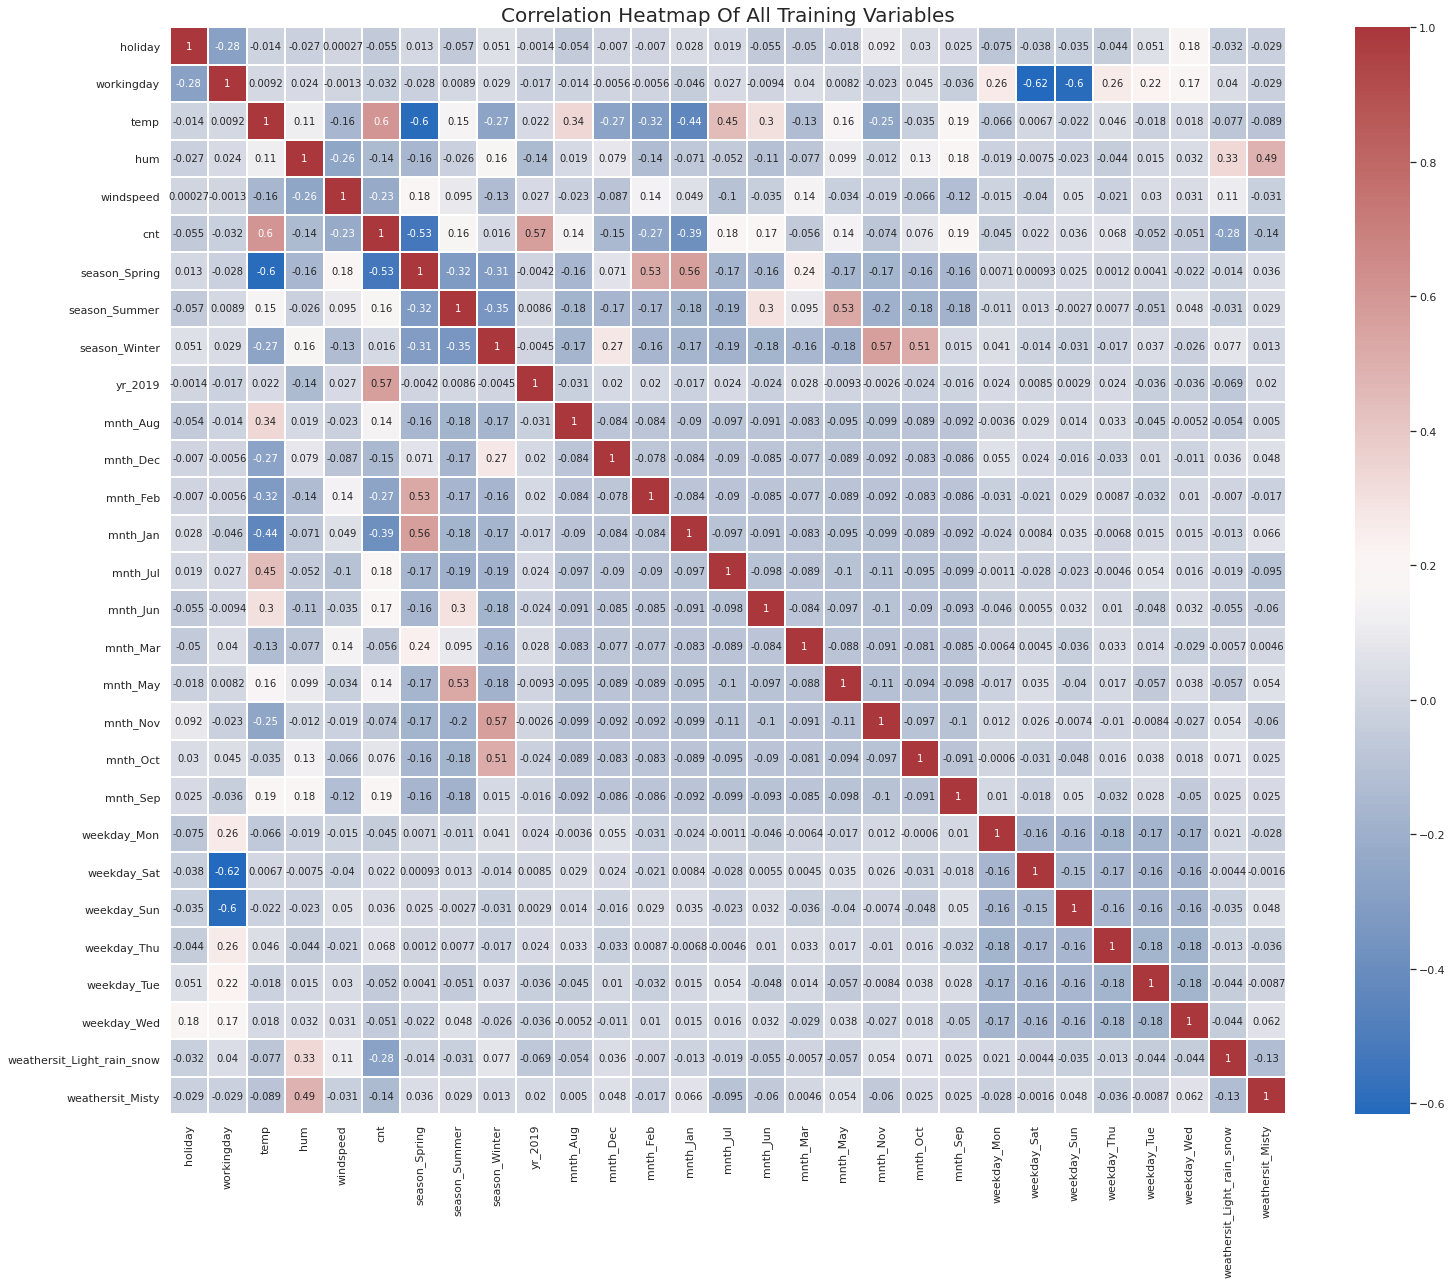

In [115]:
# Correlation Heatmap Of All Training Variables

plt.figure(figsize=[25,20])
sns.heatmap(df_train.corr(), annot=True,cmap="vlag",linewidths=.4)
plt.title('Correlation Heatmap Of All Training Variables', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Inference:** negative correlation between spring season and cnt can be seen here.

### Dividing Training Data into X and y

In [116]:
# Dividing Training Data into X and y
y_train = df_train.pop('cnt')
X_train = df_train

In [117]:
# Check columns in X_train
X_train.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Light_rain_snow', 'weathersit_Misty'],
      dtype='object')

In [118]:
# Shape of X_train
X_train.shape

(510, 28)

In [119]:
# Running RFE with the output number of the variable equal to 18
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 18)
rfe = rfe.fit(X_train, y_train)

In [120]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 8),
 ('weathersit_Light_rain_snow', True, 1),
 ('weathersit_Misty', True, 1)]

In [121]:
# True variables for model
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'yr_2019', 'mnth_Jul', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'mnth_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light_rain_snow', 'weathersit_Misty'],
      dtype='object')

In [122]:
# Remove False variables
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Nov',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## Using Statsmodel To Get Detailed Statistical Analysis

#### MODEL 1

In [123]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [124]:
# Creating a linear model and adding constant as Statsmodel doesn't add by default
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.69e-177
Time:                        14:16:37   Log-Likelihood:                 507.81
No. Observations:                 510   AIC:                            -977.6
Df Residuals:                     491   BIC:                            -897.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3516      0.079      4.449      0.000       0.196       0.507
holiday                       -0.1234      0.066     -1.869      0.062      -0.253       0.006
workingday                    -0.0614      0.071     -0.869      0.385      -0.200       0.077
temp                           0.4642      0.035     13.296      0.000       0.396       0.533
hum                           -0.1591      0.031     -5.123      0.000      -0.220      -0.098
windspeed                     -0.1602      0.024     -6.801      0.000      -0.207      -0.114
season_Spring                 -0.0938      0.022     -4.265      0.000      -0.137      -0.051
season_Summer                  0.0269      0.017      1.609      0.108      -0.006       0.060
season_Winter                  0.0530      0.019      2.777      0.006       0.016       0.091
yr_2019                        0.2330      0.008     28.210      0.000       0.217       0.249
mnth_Jul                      -0.0331      0.018     -1.847      0.065      -0.068       0.002
mnth_Mar                       0.0608      0.017      3.593      0.000       0.028       0.094
mnth_May                       0.0363      0.017      2.107      0.036       0.002       0.070
mnth_Oct                       0.0620      0.018      3.445      0.001       0.027       0.097
mnth_Sep                       0.0871      0.017      5.195      0.000       0.054       0.120
weekday_Sat                   -0.0503      0.071     -0.714      0.476      -0.189       0.088
weekday_Sun                   -0.0231      0.071     -0.328      0.743      -0.162       0.115
weathersit_Light_rain_snow    -0.2064      0.028     -7.379      0.000      -0.261      -0.151
weathersit_Misty              -0.0349      0.011     -3.114      0.002      -0.057      -0.013
==============================================================================
Omnibus:                       95.426   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.424
Skew:                          -0.970   Prob(JB):                     5.03e-49
Kurtosis:                       5.589   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_rfe.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
1,workingday,38.45
2,temp,24.78
3,hum,18.04
14,weekday_Sat,7.73
15,weekday_Sun,7.52
4,windspeed,6.58
5,season_Spring,5.74
7,season_Winter,5.33
6,season_Summer,4.27
17,weathersit_Misty,2.50


Generally VIF above 5 suggests some multicollinearity might exist, VIF above 10 suggests very strong one.
We will start dropping highly correlated or insignificant variables one by one until all variables have desired levels

In [126]:
# workingday variable has high p-value and very high VIF so we'll drop it first
X_train_new = X_train_rfe.drop('workingday', axis=1)

#### MODEL 2

In [127]:
#Build second fitted model
X_train_lm2 = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     143.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.02e-178
Time:                        14:16:37   Log-Likelihood:                 507.41
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     492   BIC:                            -902.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2893      0.033      8.729      0.000       0.224       0.354
holiday                       -0.0697      0.023     -2.991      0.003      -0.116      -0.024
temp                           0.4649      0.035     13.325      0.000       0.396       0.533
hum                           -0.1580      0.031     -5.093      0.000      -0.219      -0.097
windspeed                     -0.1610      0.024     -6.841      0.000      -0.207      -0.115
season_Spring                 -0.0929      0.022     -4.231      0.000      -0.136      -0.050
season_Summer                  0.0273      0.017      1.635      0.103      -0.006       0.060
season_Winter                  0.0521      0.019      2.735      0.006       0.015       0.090
yr_2019                        0.2335      0.008     28.374      0.000       0.217       0.250
mnth_Jul                      -0.0328      0.018     -1.836      0.067      -0.068       0.002
mnth_Mar                       0.0604      0.017      3.575      0.000       0.027       0.094
mnth_May                       0.0361      0.017      2.094      0.037       0.002       0.070
mnth_Oct                       0.0633      0.018      3.530      0.000       0.028       0.099
mnth_Sep                       0.0876      0.017      5.235      0.000       0.055       0.121
weekday_Sat                    0.0100      0.012      0.831      0.406      -0.014       0.034
weekday_Sun                    0.0372      0.012      3.011      0.003       0.013       0.061
weathersit_Light_rain_snow    -0.2066      0.028     -7.386      0.000      -0.262      -0.152
weathersit_Misty              -0.0348      0.011     -3.110      0.002      -0.057      -0.013
==============================================================================
Omnibus:                       95.030   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.276
Skew:                          -0.968   Prob(JB):                     1.47e-48
Kurtosis:                       5.572   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
2,hum,16.43
1,temp,13.21
3,windspeed,5.65
5,season_Summer,3.30
6,season_Winter,3.16
4,season_Spring,3.06
16,weathersit_Misty,2.48
7,yr_2019,2.06
8,mnth_Jul,1.83
10,mnth_May,1.63


In [129]:
# weekday_Sat variable has high p-value so we'll drop it
X_train_new = X_train_new.drop('weekday_Sat', axis=1)

#### MODEL 3

In [130]:
#Build third fitted model
X_train_lm3 = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train, X_train_lm3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.27e-179
Time:                        14:16:38   Log-Likelihood:                 507.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     493   BIC:                            -908.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2915      0.033      8.825      0.000       0.227       0.356
holiday                       -0.0705      0.023     -3.028      0.003      -0.116      -0.025
temp                           0.4653      0.035     13.342      0.000       0.397       0.534
hum                           -0.1586      0.031     -5.117      0.000      -0.220      -0.098
windspeed                     -0.1619      0.024     -6.886      0.000      -0.208      -0.116
season_Spring                 -0.0930      0.022     -4.236      0.000      -0.136      -0.050
season_Summer                  0.0270      0.017      1.619      0.106      -0.006       0.060
season_Winter                  0.0521      0.019      2.731      0.007       0.015       0.089
yr_2019                        0.2336      0.008     28.388      0.000       0.217       0.250
mnth_Jul                      -0.0336      0.018     -1.880      0.061      -0.069       0.002
mnth_Mar                       0.0604      0.017      3.575      0.000       0.027       0.094
mnth_May                       0.0364      0.017      2.114      0.035       0.003       0.070
mnth_Oct                       0.0628      0.018      3.503      0.001       0.028       0.098
mnth_Sep                       0.0873      0.017      5.216      0.000       0.054       0.120
weekday_Sun                    0.0356      0.012      2.920      0.004       0.012       0.060
weathersit_Light_rain_snow    -0.2063      0.028     -7.378      0.000      -0.261      -0.151
weathersit_Misty              -0.0346      0.011     -3.097      0.002      -0.057      -0.013
==============================================================================
Omnibus:                       94.626   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.463
Skew:                          -0.964   Prob(JB):                     2.21e-48
Kurtosis:                       5.571   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
2,hum,16.43
1,temp,13.07
3,windspeed,5.65
5,season_Summer,3.30
6,season_Winter,3.15
4,season_Spring,3.05
15,weathersit_Misty,2.48
7,yr_2019,2.06
8,mnth_Jul,1.82
10,mnth_May,1.63


In [132]:
# season_Summer variable has high p-value so we'll drop it
X_train_new = X_train_new.drop('season_Summer', axis=1)

#### MODEL 4

In [133]:
# Build fourth fitted model
X_train_lm4 = sm.add_constant(X_train_new)

lr_4 = sm.OLS(y_train, X_train_lm4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     162.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          6.41e-180
Time:                        14:16:38   Log-Likelihood:                 505.70
No. Observations:                 510   AIC:                            -979.4
Df Residuals:                     494   BIC:                            -911.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3194      0.028     11.330      0.000       0.264       0.375
holiday                       -0.0702      0.023     -3.010      0.003      -0.116      -0.024
temp                           0.4436      0.032     13.754      0.000       0.380       0.507
hum                           -0.1572      0.031     -5.067      0.000      -0.218      -0.096
windspeed                     -0.1595      0.023     -6.786      0.000      -0.206      -0.113
season_Spring                 -0.1171      0.016     -7.244      0.000      -0.149      -0.085
season_Winter                  0.0329      0.015      2.198      0.028       0.003       0.062
yr_2019                        0.2339      0.008     28.396      0.000       0.218       0.250
mnth_Jul                      -0.0441      0.017     -2.649      0.008      -0.077      -0.011
mnth_Mar                       0.0658      0.017      3.962      0.000       0.033       0.098
mnth_May                       0.0485      0.016      3.118      0.002       0.018       0.079
mnth_Oct                       0.0640      0.018      3.569      0.000       0.029       0.099
mnth_Sep                       0.0781      0.016      4.953      0.000       0.047       0.109
weekday_Sun                    0.0359      0.012      2.940      0.003       0.012       0.060
weathersit_Light_rain_snow    -0.2075      0.028     -7.410      0.000      -0.262      -0.152
weathersit_Misty              -0.0351      0.011     -3.132      0.002      -0.057      -0.013
==============================================================================
Omnibus:                       95.794   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.341
Skew:                          -0.967   Prob(JB):                     4.30e-50
Kurtosis:                       5.638   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
2,hum,15.34
1,temp,13.07
3,windspeed,4.99
5,season_Winter,2.57
14,weathersit_Misty,2.46
4,season_Spring,2.26
6,yr_2019,2.03
7,mnth_Jul,1.58
10,mnth_Oct,1.54
13,weathersit_Light_rain_snow,1.47


In [135]:
# hum variable has very high VIF so we'll drop it
X_train_new = X_train_new.drop('hum', axis=1)

#### MODEL 5

In [136]:
# Build fifth fitted model
X_train_lm5 = sm.add_constant(X_train_new)

lr_5 = sm.OLS(y_train, X_train_lm5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     164.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.25e-175
Time:                        14:16:38   Log-Likelihood:                 492.79
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     495   BIC:                            -892.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2597      0.026      9.897      0.000       0.208       0.311
holiday                       -0.0693      0.024     -2.899      0.004      -0.116      -0.022
temp                           0.4069      0.032     12.636      0.000       0.344       0.470
windspeed                     -0.1234      0.023     -5.378      0.000      -0.169      -0.078
season_Spring                 -0.1255      0.016     -7.618      0.000      -0.158      -0.093
season_Winter                  0.0192      0.015      1.272      0.204      -0.010       0.049
yr_2019                        0.2411      0.008     28.995      0.000       0.225       0.257
mnth_Jul                      -0.0382      0.017     -2.245      0.025      -0.072      -0.005
mnth_Mar                       0.0645      0.017      3.795      0.000       0.031       0.098
mnth_May                       0.0378      0.016      2.395      0.017       0.007       0.069
mnth_Oct                       0.0627      0.018      3.411      0.001       0.027       0.099
mnth_Sep                       0.0677      0.016      4.230      0.000       0.036       0.099
weekday_Sun                    0.0372      0.013      2.972      0.003       0.013       0.062
weathersit_Light_rain_snow    -0.2817      0.024    -11.530      0.000      -0.330      -0.234
weathersit_Misty              -0.0702      0.009     -7.782      0.000      -0.088      -0.052
==============================================================================
Omnibus:                       88.694   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.525
Skew:                          -0.906   Prob(JB):                     1.42e-45
Kurtosis:                       5.537   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
1,temp,5.79
2,windspeed,4.92
5,yr_2019,2.00
4,season_Winter,1.93
3,season_Spring,1.73
6,mnth_Jul,1.56
9,mnth_Oct,1.53
13,weathersit_Misty,1.49
8,mnth_May,1.31
10,mnth_Sep,1.29


In [138]:
# season_Winter variable has very high p value
X_train_new = X_train_new.drop('season_Winter', axis=1)

#### MODEL 6

In [139]:
# Build sixth fitted model
X_train_lm6 = sm.add_constant(X_train_new)

lr_6 = sm.OLS(y_train, X_train_lm6).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     176.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.06e-176
Time:                        14:16:38   Log-Likelihood:                 491.95
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     496   BIC:                            -896.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2814      0.020     14.079      0.000       0.242       0.321
holiday                       -0.0678      0.024     -2.838      0.005      -0.115      -0.021
temp                           0.3839      0.027     14.391      0.000       0.332       0.436
windspeed                     -0.1274      0.023     -5.597      0.000      -0.172      -0.083
season_Spring                 -0.1378      0.013    -10.347      0.000      -0.164      -0.112
yr_2019                        0.2414      0.008     29.028      0.000       0.225       0.258
mnth_Jul                      -0.0384      0.017     -2.257      0.024      -0.072      -0.005
mnth_Mar                       0.0626      0.017      3.692      0.000       0.029       0.096
mnth_May                       0.0333      0.015      2.164      0.031       0.003       0.064
mnth_Oct                       0.0740      0.016      4.594      0.000       0.042       0.106
mnth_Sep                       0.0688      0.016      4.296      0.000       0.037       0.100
weekday_Sun                    0.0368      0.013      2.938      0.003       0.012       0.061
weathersit_Light_rain_snow    -0.2821      0.024    -11.537      0.000      -0.330      -0.234
weathersit_Misty              -0.0706      0.009     -7.834      0.000      -0.088      -0.053
==============================================================================
Omnibus:                       86.912   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.499
Skew:                          -0.896   Prob(JB):                     7.88e-44
Kurtosis:                       5.476   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
1,temp,5.79
2,windspeed,4.70
4,yr_2019,1.96
3,season_Spring,1.63
5,mnth_Jul,1.53
12,weathersit_Misty,1.47
9,mnth_Sep,1.29
7,mnth_May,1.27
6,mnth_Mar,1.18
8,mnth_Oct,1.17


In [141]:
# windspeed variable has very high p value
X_train_new = X_train_new.drop('windspeed', axis=1)

#### MODEL 7

In [142]:
# Build seventh fitted model
X_train_lm7 = sm.add_constant(X_train_new)

lr_7 = sm.OLS(y_train, X_train_lm7).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          5.54e-171
Time:                        14:16:38   Log-Likelihood:                 476.33
No. Observations:                 510   AIC:                            -926.7
Df Residuals:                     497   BIC:                            -871.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2306      0.018     12.572      0.000       0.195       0.267
holiday                       -0.0698      0.025     -2.837      0.005      -0.118      -0.021
temp                           0.3857      0.027     14.036      0.000       0.332       0.440
season_Spring                 -0.1440      0.014    -10.525      0.000      -0.171      -0.117
yr_2019                        0.2399      0.009     28.015      0.000       0.223       0.257
mnth_Jul                      -0.0311      0.017     -1.777      0.076      -0.065       0.003
mnth_Mar                       0.0536      0.017      3.086      0.002       0.019       0.088
mnth_May                       0.0351      0.016      2.213      0.027       0.004       0.066
mnth_Oct                       0.0800      0.017      4.835      0.000       0.047       0.112
mnth_Sep                       0.0786      0.016      4.796      0.000       0.046       0.111
weekday_Sun                    0.0327      0.013      2.542      0.011       0.007       0.058
weathersit_Light_rain_snow    -0.2982      0.025    -11.921      0.000      -0.347      -0.249
weathersit_Misty              -0.0692      0.009     -7.456      0.000      -0.087      -0.051
==============================================================================
Omnibus:                       90.029   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.192
Skew:                          -0.883   Prob(JB):                     6.27e-51
Kurtosis:                       5.785   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
1,temp,3.47
3,yr_2019,1.93
4,mnth_Jul,1.47
11,weathersit_Misty,1.47
2,season_Spring,1.33
6,mnth_May,1.27
8,mnth_Sep,1.27
5,mnth_Mar,1.17
7,mnth_Oct,1.17
9,weekday_Sun,1.15


In [144]:
# mnth_Jul variable has high p value
X_train_new = X_train_new.drop('mnth_Jul', axis=1)

#### MODEL 8

In [145]:
# Build eigth fitted model
X_train_lm8 = sm.add_constant(X_train_new)

lr_8 = sm.OLS(y_train, X_train_lm8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     192.6
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.87e-171
Time:                        14:16:38   Log-Likelihood:                 474.72
No. Observations:                 510   AIC:                            -925.4
Df Residuals:                     498   BIC:                            -874.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
print(vif_df)

                      Features   VIF
1                         temp  2.56
3                      yr_2019  1.92
10            weathersit_Misty  1.45
2                season_Spring  1.31
5                     mnth_May  1.19
7                     mnth_Sep  1.19
4                     mnth_Mar  1.16
8                  weekday_Sun  1.15
6                     mnth_Oct  1.13
0                      holiday  1.04
9   weathersit_Light_rain_snow  1.04


# Residual analysis on Train data

In [147]:
y_train_pred = lr_8.predict(X_train_lm8)

In [148]:
res = y_train-y_train_pred

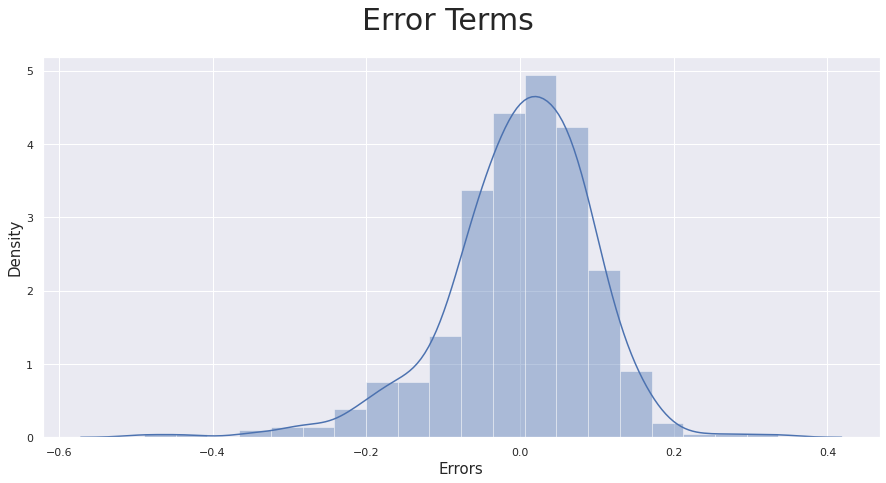

In [149]:
# Plot the histogram of the error terms

plt.figure(figsize=[15,7])
sns.distplot(res, bins = 20)
plt.suptitle('Error Terms', fontsize = 30)
plt.xlabel('Errors', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show()

**Inference:** Normal distribution can be seen of error terms with slight skewness

# Making predictions using final model

## Scaling test set to match train set

In [150]:
num_variables = ['cnt', 'windspeed', 'hum', 'temp']

df_test[num_variables] = scaler.transform(df_test[num_variables])

In [151]:
df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rain_snow,weathersit_Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.022727,0.640909,0.523860,0.504768,0.402761,0.495310,0.309091,0.222727,0.227273,0.490909,...,0.095455,0.072727,0.136364,0.163636,0.177273,0.122727,0.131818,0.127273,0.022727,0.363636
std,0.149373,0.480828,0.240908,0.206717,0.173235,0.230612,0.463173,0.417026,0.420026,0.501057,...,0.294512,0.260281,0.343957,0.370789,0.382770,0.328872,0.339064,0.334038,0.149373,0.482143
min,0.000000,0.000000,0.048429,-0.353829,0.057872,0.069144,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.303531,0.350493,0.285446,0.318540,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.514263,0.510441,0.387208,0.479579,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.747111,0.648637,0.488116,0.686925,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.015822,0.968097,1.157215,0.937069,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
#  Dividing Test Data into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [153]:
# Using columns from final train model for test
X_train_cols = X_train_new.columns
X_test = X_test[X_train_cols]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 249 to 590
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     220 non-null    int64  
 1   temp                        220 non-null    float64
 2   season_Spring               220 non-null    uint8  
 3   yr_2019                     220 non-null    uint8  
 4   mnth_Mar                    220 non-null    uint8  
 5   mnth_May                    220 non-null    uint8  
 6   mnth_Oct                    220 non-null    uint8  
 7   mnth_Sep                    220 non-null    uint8  
 8   weekday_Sun                 220 non-null    uint8  
 9   weathersit_Light_rain_snow  220 non-null    uint8  
 10  weathersit_Misty            220 non-null    uint8  
dtypes: float64(1), int64(1), uint8(9)
memory usage: 7.1 KB


In [154]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [155]:
# y predictions
y_pred = lr_8.predict(X_test_m)

In [156]:
# Calculate residuals of actual and predictions
res = y_test - y_pred

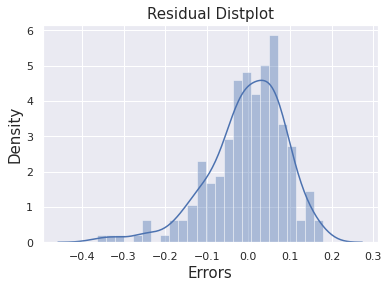

In [157]:
# Plot the histogram of the error terms

sns.set(style="darkgrid")
sns.distplot(res, bins = 25)
plt.title('Residual Distplot', fontsize = 15)
plt.xlabel('Errors', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show()

**Inference:** Normal distribution can be seen of error terms with slight skewness

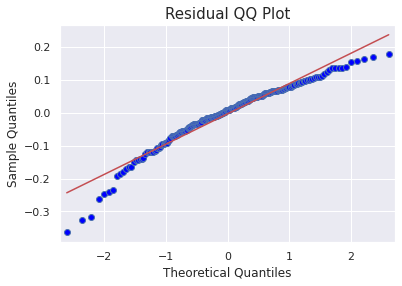

In [158]:
# Residual QQ Plot

sm.qqplot(res, line='s')
plt.title('Residual QQ Plot', fontsize = 15)
plt.show()

**Inference:** QQ plot of error terms showing some skewness as well

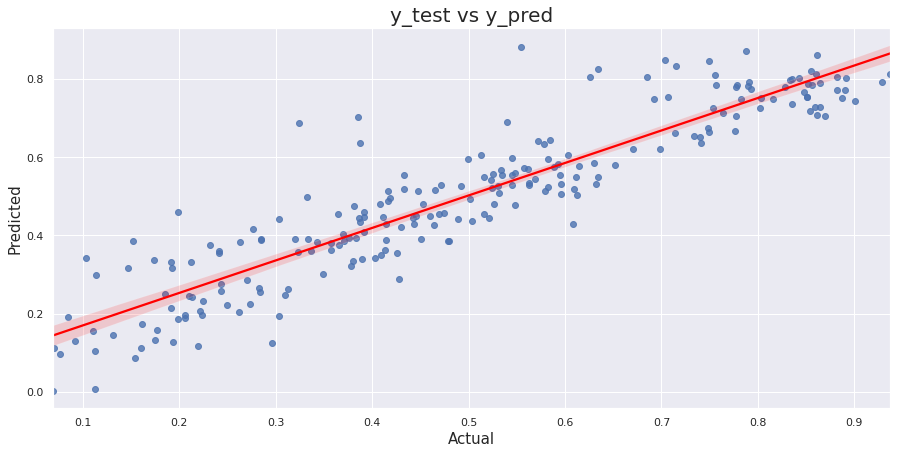

In [159]:
# Plotting y_test and y_pred to understand the spread

plt.figure(figsize=[15,7])
sns.regplot(y_test, y_pred, line_kws={"color": "red"})
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predicted', fontsize = 15)
plt.title('y_test vs y_pred', fontsize = 20)
plt.show()

**Inference:** Decently equal distribution with no visible increase or decrease in variance

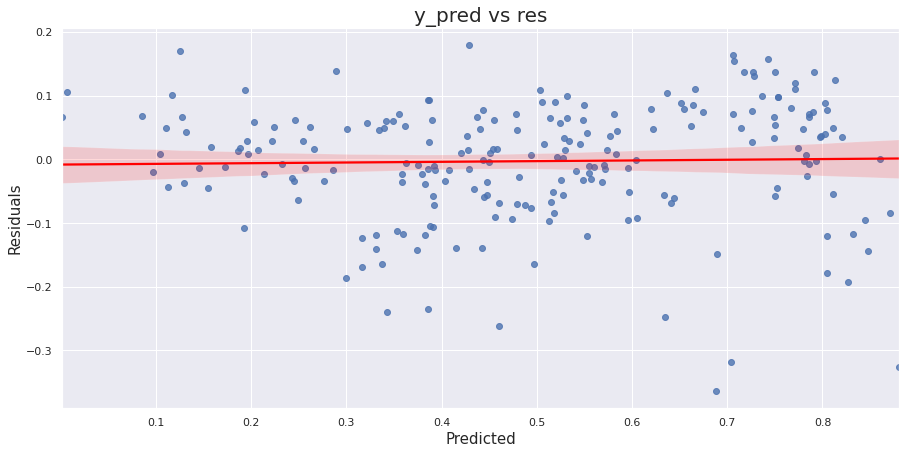

In [160]:
# Plotting res and y_pred to understand the spread

plt.figure(figsize=[15,7])
sns.regplot(y_pred,res, line_kws={"color": "red"})
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)
plt.title('y_pred vs res', fontsize = 20)
plt.show()

**Inference:** some unequal error terms can be seen towards the higher end and a few towards the lower end as well

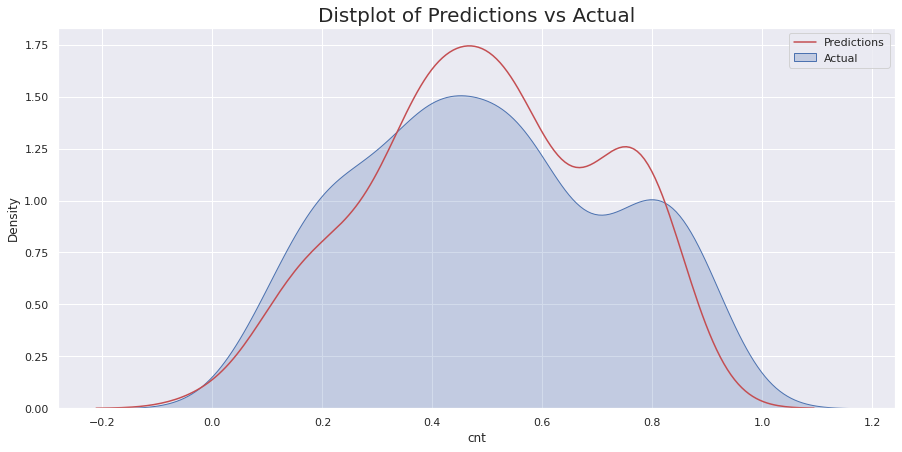

In [161]:
# Distplot of Predictions vs Actual

plt.figure(figsize=[15,7])
fig = sns.kdeplot(y_pred, color="r", label='Predictions')
fig = sns.kdeplot(y_test, shade=True, color="b", label='Actual')
plt.title('Distplot of Predictions vs Actual', fontsize=20)
plt.legend()
plt.show()

**Inference:** Displot showing decent overlap of predictions and actual data

In [162]:
# Calculating MAE and MSE
print('\nThe Mean Absolute Error of y_test, y_pred is:', MAE(y_test, y_pred))
print('\nThe Mean Squared Error of y_test, y_pred is:', MSE(y_test, y_pred))


The Mean Absolute Error of y_test, y_pred is: 0.07013584864388328

The Mean Squared Error of y_test, y_pred is: 0.008489534865712637


In [163]:
# Calculating r2 score
print('The r2 score of y_test, y_pred is:',r2_score(y_test, y_pred))

The r2 score of y_test, y_pred is: 0.8396387799349649


In [164]:
# Calculating adjusted r2 score
n=len(X_test)
k=len(X_test.columns)
adj_r2_score = 1 - ((1-r2_score(y_test, y_pred))*(n-1)/(n-k-1))
print('The adjusted r2 score of y_test, y_pred is:', adj_r2_score)

The adjusted r2 score of y_test, y_pred is: 0.8311581384892179


# Final Observations

* P-value of variables was less than 0.05 and their VIF below 5.
* The Prob (F-statistic) was almost 0 while F-statistic was significant. Both these are good indicators for the model.
* Residuals/error terms were calculated and graphed. They showed normal distribution.
* High r-squared of test data ~0.84 and the difference between r-squared and adjusted r-squared of test data also happened to be very negligible and therefore good.

